# CA-7 LP1

# Bussiness Understanding 

Our team is intending to venture into the Indian Ecosyatem and as data analyst we are to investigate the ecosystem and propose best course of action.

We will be using the CRISP-DM Methodology. We are to understand the objectives and requirements of the project, determine data mining goals, define business success criteria. Detailed plan for each project phase 


### Project Title : Viability of Setting up a Startup Business in India 

 * Hypothesis testing:

 Null Hypothesis (H0) There is no significant difference in the amount of funding recieved by startups across different sectors and stages 

 Alternative Hypothesis (H1) There is a significant difference in the amount of funding recieved by statups across different sectors and stages 
 

* Project Description - 
Our team is aiming at setting up startup in India. Using the provided information we are accessing the viability of setting up our busiess there .



ANALYTICAL QUESTIONS
1. Funding Trends:
How has the total funding amount changed year over year from 2018 to 2021?
How has the average funding amount in each sector changed over the years (2018 - 2021)
 
2. Sector Analysis:
Which sectors have received the most funding, and how does the funding distribution vary across sectors?
 
3. Stage Analysis:
What is the distribution of funding across different investment stages (e.g., Pre-seed, Seed, Series A)?
 
4. Geographical Analysis:
Which cities or regions have the highest concentration of funded startups?
 
5. Investor Influence:
Who are the top investors in the Indian startup ecosystem, and what is their funding pattern?
 
6. Founder Impact:
Is there a correlation between the number of founders and the amount of funding received?
 
7. What are the characteristics of startups in the highest-funded sectors (e.g., number of founders, location)?
 
8. Which Business is more viable to set - The best performing business(s) ? 

# Data Understanding 

 We have been provided with various datasets located at 3 different locations ie Database, OneDrive and GitHub Repository. In them we will find the start-ups details, the funding amounts recieved and the investors information from 2018-2021.
 To provide a smooth flow of project, in this phase we will be loading the data then clean the data. In the next phase, data preparation phase, we will then concatenate the data.



In [2]:
#Install necessary libraries 

%pip install pyodbc #install our connector which allows us to connect with our databases
%pip install python-dotenv
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#install'


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
#import the necessary packages 

import pyodbc 
from dotenv import dotenv_values 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings ('ignore')

In [4]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('C:\\Users\\Admin\\OneDrive\\OneDrive-Azubi\\CA-LP1\\LP1-Indian-Startup-Ecosystem-1\\Notebooks\\.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get('server')
database = environment_variables.get('database')
username = environment_variables.get('username')
password = environment_variables.get('password')

In [5]:
# Create a connection string

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"



In [6]:
connection = pyodbc.connect(connection_string)

1st Dataset-2020 (Data)

* This dataset is loaded from SQL Database

In [7]:
# Query the tabeles as per the given instructions (1st Dataset)

query = '''SELECT *
FROM dbo.LP1_startup_funding2020'''

data =pd.read_sql(query, connection)

In [8]:
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [9]:
data.tail()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None
1054,Pando,2017.0,Chennai,Logitech,Networked logistics management software,"Jayakrishnan, Abhijeet Manohar",Chiratae Ventures,9000000.0,Series A,None


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [11]:
# Missing values with their percentages 
data.isnull().sum().to_frame('Null Count').assign(Percentage=lambda x: (x['Null Count'] / len(data)) * 100)


,Null Count,Percentage
Company_Brand,0,0.000000
Founded,213,20.189573
HeadQuarter,94,8.909953
Sector,13,1.232227
What_it_does,0,0.000000
Founders,12,1.137441
Investor,38,3.601896
Amount,254,24.075829
Stage,464,43.981043
column10,1053,99.810427


In [12]:
data.shape

(1055, 10)

In [13]:
data.duplicated().sum()

3

In [14]:
data['Company_Brand'].unique()

array(['Aqgromalin', 'Krayonnz', 'PadCare Labs', 'NCOME', 'Gramophone',
       'qZense', 'MyClassboard', 'Metvy', 'Rupeek', 'Gig India',
       'Slurrp Farm', 'Medfin', 'MasterG', 'Brila 91', 'FoodyBuddy',
       'Zomato', 'OurEye.ai', 'Shiprocket', 'Pine Labs',
       'Moneyboxx Finance', 'EWar', 'SucSEED Indovation', 'TaxBuddy.com',
       'Awign Enterprises', 'Circle of Angels', 'CoinDCX', 'Glance',
       'VerSe Innovation', 'Voosh', 'Delhivery', 'Arya', 'Pickrr',
       'PhonePe', 'Countingwell', 'Callify.ai', 'Hudle', 'Cover it Up',
       'BiteSpeed', 'WakeFit', 'Sreyas Holistic Remedies', 'Fleeca India',
       'M1xchange', 'Exotel', 'PagarBook', 'PointOne Capital', 'Ayana',
       'Fisdom', 'Tinker Coders', 'Infinite Uptime', 'HappyLocate',
       'Loop Health', 'NeoDocs', 'The ePlane', 'TagMango', 'The New Shop',
       'MobiKwik', 'DebugsBunny', 'BHIVE Investech', 'Rivigo', 'ZipLoan',
       'Swipez', 'Humus', 'Artivatic.ai', 'Prescinto', 'Toppeq',
       'Bolo Indya', 'Bomb

In [15]:
data['Founded'].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 1973., 2002., 2004., 2001.])

In [16]:
data['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [17]:
HeadQuarter_counts = data['HeadQuarter'].value_counts()

HeadQuarter_counts.head ()

HeadQuarter
Bangalore    317
Mumbai       165
Gurugram      79
Delhi         62
Chennai       43
Name: count, dtype: int64

In [18]:
Founders_counts = data['Founders'].value_counts()

Founders_counts.head()

Founders
Falguni Nayar                                                6
Byju Raveendran                                              6
Mukesh Ambani                                                4
Saurabh Saxena, Pulkit Jain, Anand Prakash, Vamsi Krishna    4
Sreevathsa Prabhakar                                         4
Name: count, dtype: int64

In [19]:
Investor_counts = data['Investor'].value_counts()

Investor_counts.head()

Investor
Venture Catalysts            20
Angel investors              12
Mumbai Angels Network        12
Inflection Point Ventures    11
Undisclosed                  10
Name: count, dtype: int64

In [20]:
data['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

 Sector column has lots of spelling errors and simmilar sector values placed differently eg  AI/ AI Company,  AI Platform/ AI platform, AI Startup/AI startup ,  Agri tech/AgriTech/ Agritech. We will convert all values to lower case for easier merging then map like values in a standard sector then convert them back to upper case                                    

In [21]:
Sector_counts = data['Sector'].value_counts()

Sector_counts.head()

Sector
Fintech       80
Edtech        67
FinTech       51
EdTech        40
E-commerce    33
Name: count, dtype: int64

In [22]:
# Get the value counts in Sector column sorted alphabetically
Sector_counts = data['Sector'].value_counts().sort_index()

Sector_counts[100:200]

Sector
EV                     1
EV startup             3
Ecommerce             22
EdTech                40
EdTech Startup         4
                      ..
Marketing startup      1
Marketplace            5
Med Tech               1
Media                 19
Media & Networking     1
Name: count, Length: 100, dtype: int64

In [23]:
data['Founders'].unique()

array(['Prasanna Manogaran, Bharani C L',
       'Saurabh Dixit, Gurudutt Upadhyay', 'Ajinkya Dhariya',
       'Ritesh Tiwari',
       'Ashish Rajan Singh, Harshit Gupta, Nishant Mahatre, Tauseef Khan',
       'Rubal Chib, Dr Srishti Batra', 'Ajay Sakhamuri',
       'Shawrya Mehrotra', 'Amar Prabhu, Ashwin Soni, Sumit Maniyar',
       'Aditya Shirole, Sahil Sharma', 'Meghana Narayan',
       'Arjun Kumar, Arun Kumar, Sidharth Gurjar', 'Gayatri Jolly',
       'Ankur Jain', 'Akil Sethuraman, Anup Gopinath, Rachna Rao',
       'Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah',
       'Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal',
       'Gautam Kapoor, Saahil Goel, Vishesh Khurana', 'Amrish Rau',
       'Prashant Agarwal', 'Parth Chadha, Rahul Singh',
       'Vikrant Varshney', 'Sujit Bangar',
       'Annanya Sarthak, Gurpreet Singh, Praveen Sah', 'Karanpal Singh',
       'Neeraj Khandelwal, Sumit Gupta', 'Naveen Tewari',
       'Virendra Gupta', 'Priyam Saraswat',
       'Kapil Bharati,

In [24]:
Founders_counts = data['Founders'].value_counts()

Founders_counts.head()

Founders
Falguni Nayar                                                6
Byju Raveendran                                              6
Mukesh Ambani                                                4
Saurabh Saxena, Pulkit Jain, Anand Prakash, Vamsi Krishna    4
Sreevathsa Prabhakar                                         4
Name: count, dtype: int64

In [25]:
data['Investor'].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center',
       'Venture Catalysts, PointOne Capital',
       'Siana Capital Management, Info Edge',
       'Venture Catalysts, 9Unicorns Accelerator Fund', 'ICICI Bank.',
       'HostelFund', 'KB Investment, Bertelsmann India Investments',
       'Shantanu Deshpande, Subramaniam Ramadorai', 'Fireside Ventures',
       'Axilor Ventures, S.D. Shibulal', "Acumen Fund's angel programme",
       'Sequoia Capital India, Sixth Sense Ventures', 'Rebel Foods',
       'Kora, Tiger Global Management', '100X VC, Amara Ventures',
       'Bertelsmann India Investments, InnoVen Capital',
       'Mastercard, Temasek Holdings', 'BlackSoil, Caspian',
       'Jindal Steels, Jeet Banerjee', None, 'Zenith Global',
       'Unitus Ventures, Work10M', 'Coinbase Ventures, Polychain',
       'Mithril Capital Management.', 'Google', 'Better Capital',
       'Steadview Capital, Canada Pension Plan Investment Board',
       'Quona Capital', 'Swastika', 'Flipka

In [26]:
Investor_counts = data['Investor'].value_counts()

Investor_counts.head(11)

Investor
Venture Catalysts            20
Angel investors              12
Mumbai Angels Network        12
Inflection Point Ventures    11
Undisclosed                  10
Sequoia India                 6
Unicorn India Ventures        6
Better Capital                5
Trifecta Capital              5
Chiratae Ventures             4
Nexus Venture Partners        4
Name: count, dtype: int64

In [27]:
data['Amount'].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [28]:
# Statistical Summary 
data['Amount'].describe().T

count    8.010000e+02
mean     1.130430e+08
std      2.476635e+09
min      1.270000e+04
25%      1.000000e+06
50%      3.000000e+06
75%      1.100000e+07
max      7.000000e+10
Name: Amount, dtype: float64

In [29]:
data['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [30]:
Stage_counts = data['Stage'].value_counts()

Stage_counts.head()

Stage
Series A        96
Seed            80
Seed Round      69
Series B        57
Pre series A    54
Name: count, dtype: int64

Data cleaning 1st Dataset-2020 (Data)

In [31]:
 # Handling Company_Brand ensure all values start with upper case

# Convert all enries to title
data['Company_Brand'] = data['Company_Brand'].str.title()

In [32]:
# Handling Headquarter Column 

# Find top HeadQuarters to be used randomnly in filling missing values 
top_HeadQuarter= ['Bangalore','Mumbai','Gurugram','Delhi','Chennai','Pune','New Delhi','Noida','Hyderabad','Gurgaon',
'Ahmedabad','Kolkata','Haryana','Indore','Jaipur','Thane','Kochi','Gujarat','California','Singapore']

# Fill missing value with random values from top 20 Hedquarter

def  fill_missing_HeadQuarter (HeadQuarter):
    if pd.isna(HeadQuarter):
        return np.random.choice(top_HeadQuarter)
    return HeadQuarter


data['HeadQuarter']=data['HeadQuarter'].apply(fill_missing_HeadQuarter)


# Convert all enries to title
data['HeadQuarter'] = data['HeadQuarter'].str.title()


In [33]:
# Handling Founded Column 

# Fill missing values with the median
data['Founded'] = data['Founded'].fillna(data['Founded'].median())


# Convert 'Founded'  to integer datatype 
data['Founded'] = data ['Founded'].astype(int)


In [34]:
# Handling the Sector Column 

top_Sector =['Fintech','EdTech','Healthtech','SaaS','Ecommerce','AgriTech','Ai',
             'Gaming', 'Logistics', 'Foodtech', 'Food', 'Entertainment', 'Tech Company', 'Iot', 'Cosmetics', 'Automobile']

# Fill missing value with random values from top 16 Sector

def  fill_missing_Sector (Sector):
    if pd.isna(Sector):
        return np.random.choice(top_Sector)
    return Sector

data['Sector']=data['Sector'].apply(fill_missing_Sector)

# Convert all values to lower case
data['Sector'] = data['Sector'].str.lower()

import re
 
def sector_redistribution(Sector):
    if re.search('bank|fintech|finance|credit|mobile Payments|lending|crypto|financial services|account|credit|venture|crowd|blockchain|mutual funds|virtual banking|banking|', Sector):
        return 'Finance'
    elif re.search(r'automotive|air transport|transport|ticketing|logistics|vehicle|transportation|developer platform|app|', Sector):
        return 'Transport'
    elif re.search(r'agriTech|agri|farming|agriculture|agtech|', Sector):  
        return 'Agriculture'
    elif re.search(r'legal tech|automotive tech|automation|analytics|big data|cybersecurity|cloud infrastructure|automobile|infratech|biotechnology|automobile & technology|robotics & ai|e-marketplace|iot|ai|ecommerce|technology|saas|ai & tech|e-commerce|e-commerce|ar|fintech|hr tech|safety tech|', Sector):
        return 'Technology'
    elif re.search (r'marketing|customer loyalty|product research|advertising|brand marketing|event promotion|market research|', Sector):
        return 'Marketing'
    elif re.search (r'insurance technology|insurance|', Sector):
        return 'Insurance '
    elif re.search (r'food tech|food|food & nutrition|food & tech|snack food|food processing|nutrition|food & beverage|food delivery|', Sector):
        return 'Food'
    elif re.search (r'pharmaceutical|healthtech|personal health|peer to peer|health diagnostic|health|' , Sector):
        return 'Health & Wellness'
    elif re.search (r'yoga|sports|yoga & wellness|', Sector):
        return 'Fitness'
    elif re.search (r'manufacturing', Sector):
        return 'Manufacturing'
    elif re.search (r'cosmetics|beauty|', Sector):
        return 'Beauty'
    elif re.search(r'social media|broadcasting|video chat|messaging|online portals|media and entertainmwent|audio|e-sports|games|internet|gaming|', Sector):
        return 'Info-media'
    elif re.search(r'interior design|accomodation|home renovation|service industry|laundry and dry cleaning|home decor|home improvement|hospitality|hotel|leisure|', Sector):
        return 'Sevice Industry'
    elif re.search (r'edtech|education|learning|', Sector):
        return 'Education'
    elif re.search(r'fashion|eyewear|jewellery|lifestyle|', Sector):
        return 'Fashion'
    elif re.search(r' b2b|b2B|supply chain|marketplace|retail|entreprise software|retail|consumer goods|trading platform|consumer|', Sector):
        return 'Entreprising'
    elif re.search(r'waste management|', Sector):
        return 'Environment'
    elif re.search(r'rental|property|real estate|smart building', Sector):
        return 'Real Estate'
    elif re.search(r'fraud detection|security|intelligence|cyber security|public safety|', Sector):
        return 'Security'
    
    else:
        return Sector
    
    
# Convert all entries to title case 
data['Sector'] = data['Sector'].str.title()
    
data['Sector'] 


 

0                 Agritech
1                   Edtech
2       Hygiene Management
3                   Escrow
4                 Agritech
               ...        
1050                Edtech
1051               Fintech
1052             Cosmetics
1053             Transport
1054              Logitech
Name: Sector, Length: 1055, dtype: object

In [35]:
Sector_counts = data['Sector'].value_counts()

Sector_counts.head(10)

Sector
Fintech       133
Edtech        108
Healthtech     44
Agritech       38
E-Commerce     33
Saas           25
Ecommerce      22
Media          19
Tech           19
Ai             18
Name: count, dtype: int64

In [36]:
#Handling Founders Column with the top Founders 

top_Founders =[ 'Falguni Nayar','Byju Raveendran','Mukesh Ambani','Saurabh Saxena',
                'Pulkit Jain', 'Anand Prakash', 'Vamsi Krishna','Sreevathsa Prabhakar']

# Fill missing value with random values from top 8 Founders

def  fill_missing_Founders (Founders):
    if pd.isna(Founders):
        return np.random.choice(top_Founders)
    return Founders

data['Founders']=data['Founders'].apply(fill_missing_Founders)

# Convert all entries to title case 
data['Founders'] = data['Founders'].str.title()

In [37]:
# Handling the Investors Column ith the most appearing Investor

top_Investor= ['Venture Catalysts','Angel Investors','Mumbai Angels Network','Inflection Point Ventures',
               'Unicorn India Ventures','Sequoia','India', 'Chiratae Ventures','Better Capital','Trifecta Capital','Titan Capital']

# Fill missing values 
def  fill_missing_Investor (Investor):
    if pd.isna(Investor):
        return np.random.choice(top_Investor)
    return Investor

data['Investor']=data['Investor'].apply(fill_missing_Investor)

# Convert all entries to title
data['Investor'] = data['Investor'].str.title()


In [38]:
# Handling the Amount Column

# For 'Amount', fill missing values with the median funding amount
data['Amount'].fillna(data['Amount'].median(), inplace=True)

In [39]:
# Convert scientific notation to standard notation for the 'amount' column
#data['Amount'] = data['Amount'].apply(lambda x: '{:.0f}'.format(float(x)))
# Convert 'Amount'  to Float datatype 
#data['Amount'] = data ['Amount'].astype(float) 

#data['Amount']

In [40]:

# Fill missing value with random values from top 8 Founders

top_Stage = ['Series A','Seed','Seed Round','Series B','Pre series A','Series C' ]

def  fill_missing_Stage (Stage):
    if pd.isna(Stage):
        return np.random.choice(top_Stage)
    return Stage

data['Stage']=data['Stage'].apply(fill_missing_Stage)

# Convert the stage column from object to category 

data['Stage'] = data['Stage'].astype('category')

In [41]:
#Drop the Column10 column it has more than 98% NULL values and also in the 2021,2019,2018 data this column is not available meaning its impact is minimal
data.drop('column10', axis=1, inplace=True)


In [42]:
# Drop duplicates

data.drop_duplicates( inplace=True)

In [43]:
# Check for duplicates

data.duplicated().sum()

0

In [44]:
# Add 'Year' Column 2020
data['Year']= 2020

# Convert year Column to a dataetime format
#data['Year'] = pd.to_datetime(data['Year'], format='%Y') #Convert it to a datetime format only if your analysis specifically requires datetime operations


In [45]:
#Check to confirm there are no missing values 

data.isnull().sum()

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
Year             0
dtype: int64

In [46]:
# Check how our 1st dataset (2020) looks like ---looks good to go
data.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 1053 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Company_Brand  1053 non-null   object  
 1   Founded        1053 non-null   int32   
 2   HeadQuarter    1053 non-null   object  
 3   Sector         1053 non-null   object  
 4   What_it_does   1053 non-null   object  
 5   Founders       1053 non-null   object  
 6   Investor       1053 non-null   object  
 7   Amount         1053 non-null   float64 
 8   Stage          1053 non-null   category
 9   Year           1053 non-null   int64   
dtypes: category(1), float64(1), int32(1), int64(1), object(6)
memory usage: 80.6+ KB


2nd Dataset-2021 (data2)

* This dataset is loaded from SQL Database 

In [47]:
#Loading the second dataset which is our tabel 2 (Data2)
query ='''SELECT * FROM dbo.LP1_startup_funding2021'''
 
data2 = pd.read_sql(query, connection)


In [48]:
data2.head ()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [49]:
data2.tail ()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B
1208,WeRize,2019.0,Bangalore,Financial Services,India’s first socially distributed full stack ...,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",$8000000,Series A


In [50]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [51]:
data2.columns 

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [52]:
data2.shape

(1209, 9)

In [53]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,1208.0,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0


In [54]:
data2.duplicated().sum()

19

In [55]:
# Missing values with their percentages 
data2.isnull().sum().to_frame('Null Count').assign(Percentage=lambda x: (x['Null Count'] / len(data)) * 100)

,Null Count,Percentage
Company_Brand,0,0.000000
Founded,1,0.094967
HeadQuarter,1,0.094967
Sector,0,0.000000
What_it_does,0,0.000000
Founders,4,0.379867
Investor,62,5.887939
Amount,3,0.284900
Stage,428,40.645774


In [56]:
data2['Company_Brand'].unique()

array(['Unbox Robotics', 'upGrad', 'Lead School', ..., 'Gigforce',
       'Vahdam', 'WeRize'], dtype=object)

In [57]:
data2['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011.,   nan, 2009.,
       2002., 1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991.,
       1984., 2004., 2005., 1963.])

In [58]:
HeadQuarter_counts = data2['HeadQuarter'].value_counts()

HeadQuarter_counts.head()

HeadQuarter
Bangalore    426
Mumbai       203
Gurugram     155
New Delhi    144
Pune          47
Name: count, dtype: int64

In [59]:
data2['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

In [60]:
Founders_counts = data2['Founders'].value_counts()

Founders_counts.head(7)

Founders
Ashneer Grover, Shashvat Nakrani    7
Byju Raveendran, Divya Gokulnath    5
Bhavish Aggarwal                    4
Ritesh Agarwal                      4
Nirmit Parikh                       3
Kunal Shah                          3
Kshama Fernandes                    3
Name: count, dtype: int64

In [61]:
Investor_counts = data2['Investor'].value_counts()

Investor_counts.head(11)

Investor
Inflection Point Ventures    24
Tiger Global                 11
Venture Catalysts            11
Elevation Capital             7
Titan Capital                 6
We Founder Circle             6
Anicut Angel Fund             5
Sequoia Capital India         5
Kalaari Capital               5
Sixth Sense Ventures          5
Blue Ashva Capital            4
Name: count, dtype: int64

In [62]:
data2['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [63]:
Stage_counts = data2['Stage'].value_counts()

Stage_counts.head(7)

Stage
Seed            246
Pre-series A    157
Series A        126
Series B         49
Pre-seed         47
Series C         45
Debt             27
Name: count, dtype: int64

In [64]:
data2['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [65]:
Sector_counts = data2['Sector'].value_counts()

Sector_counts.head()

Sector
FinTech               122
EdTech                102
Financial Services     61
E-commerce             37
Food & Beverages       37
Name: count, dtype: int64

In [66]:
# Get the value counts in Sector column sorted alphabetically
Sector_counts = data2['Sector'].value_counts().sort_index()

Sector_counts[200:250]

Sector
Professional Training & Coaching                                                                               2
Real Estate                                                                                                    7
Real estate                                                                                                    1
Recruitment                                                                                                    5
Renewable Energy                                                                                               6
Renewables & Environment                                                                                       3
Rental                                                                                                         2
Rental space                                                                                                   2
Retail                                                                                   

In [67]:
data2['Amount'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

Data Cleaning 2nd Dataset (data2)

In [68]:
# Handling  Company_Brand

# Convert all enries to title
data2['Company_Brand'] = data2['Company_Brand'].str.title()

In [69]:
# Handling Founded Column 

# Fill missing values with the median
data2['Founded'] = data2['Founded'].fillna(data2['Founded'].median())


# Convert 'Founded'  to integer datatype 
data2['Founded'] = data2 ['Founded'].astype(int)


In [70]:
# Handling Hedquarter Column 

# Replace this values 'Food & Beverages', 'Online Media\t#Ref!', 'Information Technology & Services'- with Bangalore

data2['HeadQuarter']= data2['HeadQuarter'].replace('Food & Beverages','Bangalore' )
data2['HeadQuarter']= data2['HeadQuarter'].replace('Online Media\t#Ref!','Bangalore')
data2['HeadQuarter']= data2['HeadQuarter'].replace('Online Media\t#Ref!', 'Bangalore')
data2['HeadQuarter']= data2['HeadQuarter'].replace('Information Technology & Services', 'Bangalore')
data2['HeadQuarter']= data2['HeadQuarter'].replace('Pharmaceuticals\t#REF!', 'Bangalore')
data2['HeadQuarter']= data2['HeadQuarter'].replace('Gurugram\t#REF!', 'Gurugram')
data2['HeadQuarter']= data2['HeadQuarter'].replace('Computer Games', 'Bangalore')

top_HeadQuarter= ['Bangalore','Mumbai','Gurugram','Delhi','Chennai','Pune','New Delhi','Noida','Hyderabad','Gurgaon',
'Ahmedabad','Kolkata','Haryana','Indore','Jaipur','Thane','Kochi','Gujarat','California','Singapore']

# Fill missing value with random values from top 20 Headquarter

def  fill_missing_HeadQuarter (HeadQuarter):
    if pd.isna(HeadQuarter):
        return np.random.choice(top_HeadQuarter)
    return HeadQuarter


data2['HeadQuarter']=data2['HeadQuarter'].apply(fill_missing_HeadQuarter)

# Convert all enries to title
data2['HeadQuarter'] = data2['HeadQuarter'].str.title()

In [71]:
#Handling Founders Column 

# Fill missing value with random values from top 8 Founders

top_Founders = ['Ashneer Grover & Shashvat Nakrani','Byju Raveendran & Divya Gokulnath','Ashneer Grover & Shashvat Nakrani', 
                'Bhavish Aggarwal', 'Ritesh Agarwal','Kunal Shah', 'Ashish Singhal & Govind Soni & Vimal Sagar Tiwari']

def  fill_missing_Founders (Founders):
    if pd.isna(Founders):
        return np.random.choice(top_Founders)
    return Founders

data2['Founders']=data2['Founders'].apply(fill_missing_Founders)

# Convert all entries to title case 
data2['Founders'] = data2['Founders'].str.title()


In [72]:
#Handling Investor Column with the most appearing investor 


top_Investor= ['Venture Catalysts','Elevation Capital','Anicut Angel Fund','Inflection Point Ventures','We Founder Circle',
               'Sequoia Capital','Kalaari Capital ', 'Sixth Sense Ventures','Blue Ashva Capital','Titan Capital']
# Fill missing values 
def  fill_missing_Investor (Investor):
    if pd.isna(Investor):
        return np.random.choice(top_Investor)
    return Investor

data2['Investor']=data2['Investor'].apply(fill_missing_Investor)


# Convert all entries to title case 
data2['Investor'] = data2['Investor'].str.title()

'Seed'            
 Pre-series A      
'Series A'      
'Series B'        
'Pre-seed'         
'Series C'         
'Debt'

In [73]:
# Handling stage column with the most appearing-'Seed ' 

top_Stage= ['Seed','Pre-series A','Series A','Series B','Pre-seed','Series C', 'Debt']

# Fill missing values 
def  fill_missing_Stage (Stage):
    if pd.isna(Stage):
        return np.random.choice(top_Stage)
    return Stage

data2['Stage']=data2['Stage'].apply(fill_missing_Stage)


# Convert the stage column from object to category 
data2['Stage'] = data2['Stage'].astype('category')

In [74]:
# Handling Sector Column

# Convert all values to lower case
data2['Sector'] = data2['Sector'].str.lower()

import re
 
def sector_redistribution(Sector):
    if re.search('bank|fintech|finance|credit|mobile Payments|lending|crypto|financial services|account|credit|venture|crowd|blockchain|mutual funds|virtual banking|banking|', Sector):
        return 'Finance'
    elif re.search(r'automotive|air transport|transport|ticketing|logistics|vehicle|transportation|developer platform|app|', Sector):
        return 'Transport'
    elif re.search(r'agriTech|agri|farming|agriculture|agtech|', Sector):  
        return 'Agriculture'
    elif re.search(r'legal tech|automotive tech|automation|analytics|big data|cybersecurity|cloud infrastructure|automobile|infratech|biotechnology|automobile & technology|robotics & ai|e-marketplace|iot|ai|ecommerce|technology|saas|ai & tech|e-commerce|e-commerce|ar|fintech|hr tech|safety tech|', Sector):
        return 'Technology'
    elif re.search (r'marketing|customer loyalty|product research|advertising|brand marketing|event promotion|market research|', Sector):
        return 'Marketing'
    elif re.search (r'insurance technology|insurance|', Sector):
        return 'Insurance '
    elif re.search (r'food tech|food|food & nutrition|food & tech|snack food|food processing|nutrition|food & beverage|food delivery|', Sector):
        return 'Food'
    elif re.search (r'pharmaceutical|healthtech|personal health|peer to peer|health diagnostic|health|' , Sector):
        return 'Health & Wellness'
    elif re.search (r'yoga|sports|yoga & wellness|', Sector):
        return 'Fitness'
    elif re.search (r'manufacturing', Sector):
        return 'Manufacturing'
    elif re.search (r'cosmetics|beauty|', Sector):
        return 'Beauty'
    elif re.search(r'social media|broadcasting|video chat|messaging|online portals|media and entertainmwent|audio|e-sports|games|internet|gaming|', Sector):
        return 'Info-media'
    elif re.search(r'interior design|accomodation|home renovation|service industry|laundry and dry cleaning|home decor|home improvement|hospitality|hotel|leisure|', Sector):
        return 'Sevice Industry'
    elif re.search (r'edtech|education|learning|', Sector):
        return 'Education'
    elif re.search(r'fashion|eyewear|jewellery|lifestyle|', Sector):
        return 'Fashion'
    elif re.search(r' b2b|b2B|supply chain|marketplace|retail|entreprise software|retail|consumer goods|trading platform|consumer|', Sector):
        return 'Entreprising'
    elif re.search(r'waste management|', Sector):
        return 'Environment'
    elif re.search(r'rental|property|real estate|smart building', Sector):
        return 'Real Estate'
    elif re.search(r'fraud detection|security|intelligence|cyber security|public safety|', Sector):
        return 'Security'
    
    else:
        return Sector
    
    
# Convert all entries to title case 
data2['Sector'] = data2['Sector'].str.title()
    
data2['Sector'] 



0                  Ai Startup
1                      Edtech
2                      Edtech
3              B2B E-Commerce
4                     Fintech
                ...          
1204    Staffing & Recruiting
1205         Food & Beverages
1206       Financial Services
1207                   Edtech
1208       Financial Services
Name: Sector, Length: 1209, dtype: object

In [75]:
Sector_counts = data2['Sector'].value_counts()

Sector_counts.head()

Sector
Fintech               122
Edtech                102
Financial Services     61
Healthcare             52
E-Commerce             37
Name: count, dtype: int64

In [76]:
# Handling the Amount Column


# Ensure the Amount column is treated as strings
data2['Amount'] = data2['Amount'].astype(str)

# List of specific non-numeric values to drop
non_numeric_values = [
    "Undisclosed", "Upsparks", "Series C", "Seed", "Pre-series A",
    "ITO Angel Network, LetsVenture", "ah! Ventures", "JITO Angel Network, LetsVenture", ""
]

# Step 1: Drop specific non-numeric values
data2 = data2[~data2['Amount'].isin(non_numeric_values)] 

# Step 2: Remove dollar signs and commas
data2['Amount'] = data2['Amount'].str.replace(r'[$,]', '', regex=True)

# Step 3: Convert the Amount column to numeric, setting errors='coerce' will turn non-convertible values to NaN
data2['Amount'] = pd.to_numeric(data2['Amount'], errors='coerce')

# Step 4: Fill all missing values with the median of the Amount column
data2['Amount'] = data2['Amount'].fillna(data2['Amount'].median())

# Step 5: Convert Amount to Foat Datatype  
data2['Amount'] = data2['Amount'].astype(float)

data2['Amount']


0         1200000.0
1       120000000.0
2        30000000.0
3        51000000.0
4         2000000.0
           ...     
1204      3000000.0
1205     20000000.0
1206     55000000.0
1207     26000000.0
1208      8000000.0
Name: Amount, Length: 1156, dtype: float64

In [77]:
#Check to confirm there are no missing values     

data2.isnull().sum()    

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

In [78]:
# Drop duplicates for data2- they were 19 duplicates will this affect the results of our data

data2.drop_duplicates( inplace=True)

In [79]:
#Check to see if the are duplicated values after filling with the mode values 

data2.duplicated().sum()


0

In [80]:
#Add 'Year' Column 2021
data2['Year']=2021

In [81]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Company_Brand  1145 non-null   object  
 1   Founded        1145 non-null   int32   
 2   HeadQuarter    1145 non-null   object  
 3   Sector         1145 non-null   object  
 4   What_it_does   1145 non-null   object  
 5   Founders       1145 non-null   object  
 6   Investor       1145 non-null   object  
 7   Amount         1145 non-null   float64 
 8   Stage          1145 non-null   category
 9   Year           1145 non-null   int64   
dtypes: category(1), float64(1), int32(1), int64(1), object(6)
memory usage: 87.4+ KB


3rd Dataset 2019 (data3)

* This Dataset is downloaded from a onedrive 

In [82]:
#Load the one drive file which is the 2019 startups data (3rd Dataset)

data3=pd.read_excel ('C:\\Users\\Admin\\OneDrive\\OneDrive-Azubi\\CA-LP1\\LP1-Indian-Startup-Ecosystem-1\\startup_funding2019.xlsx')



In [83]:
data3.head ()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000,Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000,NaN


In [84]:
data3.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...",20000000,Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000,NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,5000000,Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000,NaN
88,Ess Kay Fincorp,NaN,Rajasthan,Banking,Organised Non-Banking Finance Company,Rajendra Setia,"TPG, Norwest Venture Partners, Evolvence India",33000000,NaN


In [85]:
data3.shape

(89, 9)

In [86]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,60.0,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0


In [87]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [88]:
# Missing values with their percentages 
data3.isnull().sum().to_frame('Null Count').assign(Percentage=lambda x: (x['Null Count'] / len(data)) * 100)

,Null Count,Percentage
Company/Brand,0,0.000000
Founded,29,2.754036
HeadQuarter,19,1.804368
Sector,5,0.474834
What it does,0,0.000000
Founders,3,0.284900
Investor,0,0.000000
Amount($),0,0.000000
Stage,46,4.368471


In [89]:
data3.duplicated().sum()

0

In [90]:
data3['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [91]:
Sector_counts = data3['Sector'].value_counts()

Sector_counts.head(10)

Sector
Edtech        7
Fintech       5
AgriTech      4
Technology    4
SaaS          4
Automobile    3
E-commerce    3
Logistics     3
Food          2
Foodtech      2
Name: count, dtype: int64

In [92]:
data3['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [93]:
HeadQuarter_counts = data3['HeadQuarter'].value_counts()

HeadQuarter_counts.head(11)

HeadQuarter
Bangalore    21
Mumbai       12
Delhi        10
Noida         5
Gurugram      5
Chennai       4
Pune          2
Jaipur        2
Telangana     1
Ahmedabad     1
Haryana       1
Name: count, dtype: int64

In [94]:
data3['Founders'].unique()

array(['Shantanu Deshpande', 'Adamas Belva Syah Devara, Iman Usman.',
       'Jatin Solanki', 'Srikanth Iyer, Rama Harinath',
       'Narayana Reddy Punyala', 'Nitin Gupta',
       'Vivek AG, Veekshith C Rai',
       'Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa',
       'Renuka Ramnath', 'Peyush Bansal, Amit Chaudhary, Sumeet Kapahi',
       'Abhay Bhat, Kinnar Shah', 'D Padmanabhan',
       'Puneet Gupta, Sucharita Mukherjee', 'Ishit Jethwa',
       'Ahana Gautam, Udit Kejriwal', 'Rakesh Malhotra',
       'Byju Raveendran', 'Chapman, Priya Sharma, Ashish Anantharaman',
       'Amit Modi', 'Mohammed, Shashwat Diesh', 'Renato Araujo',
       'Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garima Sawhney',
       'Gautam Tambay, Parul Gupta', 'Dhiraj Naubhar, Dheeraj Bansal',
       'Tushar Kumar, Prashant Singh', 'Arihant Jain, Ajeet Kushwaha',
       'Nishant Jain, Rohan Kumar', 'Sam Udotong',
       'Sandipan Mitra, Uttam Kumar',
       'Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwal, 

In [95]:
Founders_counts = data3['Founders'].value_counts()

Founders_counts.head(10)

Founders
Vivek Gupta, Abhay Hanjura                                 2
Shantanu Deshpande                                         1
Manish Kumar                                               1
Saurav Kumar                                               1
Visakh Sasikumar                                           1
Sandeep Dalmia, Anindya Dutta                              1
Krishnan, Manju Dhawan, K Satyanarayana, Sanjeev Saxena    1
Sawan Kumar, Bhavya Bhambhani                              1
Mayank Dhanuka, Sunoor Kaul                                1
Akanksha Hazari                                            1
Name: count, dtype: int64

In [96]:
data3['Investor'].unique()

array(['Sixth Sense Ventures', 'General Atlantic',
       'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
       'Evolvence India Fund (EIF), Pidilite Group, FJ Labs',
       'Innovation in Food and Agriculture (IFA)', 'Undisclosed',
       'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.',
       'Gilda VC, Art Venture, Rajeev Chitrabhanu.',
       'Multiples Alternate Asset Management', 'SoftBank',
       'Venture Catalysts', 'Avataar Ventures', 'Oikocredit',
       'Titan Capital', 'Matrix Partners',
       'German development finance institution DEG',
       'South Africa’s Naspers Ventures, the CPP Investment Board',
       'Goldman Sachs.', 'Mumbai Angels Network',
       'Kunal Bahl, Rohit Bansal.', 'Brazilian VC Fund Confrapar',
       'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.',
       'Reach Capital', 'Inflection Point Ventures',
       'Wilson Global Opportunities Fund

In [97]:
data3['Amount($)'].unique()

array([6300000, 150000000, 28000000, 30000000, 6000000, 'Undisclosed',
       1000000, 20000000, 275000000, 22000000, 5000000, 140500, 540000000,
       15000000, 182700, 12000000, 11000000, 15500000, 1500000, 5500000,
       2500000, 140000, 230000000, 49400000, 32000000, 26000000, 150000,
       400000, 2000000, 100000000, 8000000, 100000, 50000000, 120000000,
       4000000, 6800000, 36000000, 5700000, 25000000, 600000, 70000000,
       60000000, 220000, 2800000, 2100000, 7000000, 311000000, 4800000,
       693000000, 33000000], dtype=object)

In [98]:
data3['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [99]:
Stage_counts = data3['Stage'].value_counts()

Stage_counts.head(10)

Stage
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Name: count, dtype: int64

Data cleaning 3rd Dataset 2019- (daat3)

In [100]:
# Handling the Company/Brand Colum

#Change column name to Company_Brand

data3.rename(columns={'Company/Brand': 'Company_Brand'}, inplace=True)

# Convert all enries to title
data3['Company_Brand'] = data3['Company_Brand'].str.title()


In [101]:
# Handling Founded Column

# Fill missing values with the median
data3['Founded'] = data3['Founded'].fillna(data3['Founded'].median())


# Convert 'Founded'  to integer datatype 
data3['Founded'] = data3 ['Founded'].astype(int)


In [102]:
# Handling the HeadQuarter Colum fill with the most appearing HeadQuarter

#Fill missing Values 

top_HeadQuarter = ['Bangalore','Mumbai','Delhi','Noida','Gurugram','Chennai','Pune', 'Jaipur', 'Telangana', 'Ahmedabad', 'Haryana']

def  fill_missing_HeadQuarter (HeadQuarter):
    if pd.isna(HeadQuarter):
        return np.random.choice(top_HeadQuarter)
    return HeadQuarter


data3['HeadQuarter']=data3['HeadQuarter'].apply(fill_missing_HeadQuarter)


In [103]:
# Handling the Sector column Fill with the most appearing sector

top_Sector =['Fintech','EdTech','Healthtech','SaaS','Ecommerce','AgriTech','Ai',
             'Gaming', 'Logistics', 'Foodtech', 'Food', 'Entertainment', 'Tech Company', 'Iot', 'Cosmetics', 'Automobile']

# Fill missing value with random values from top 16 Sector

def  fill_missing_Sector (Sector):
    if pd.isna(Sector):
        return np.random.choice(top_Sector)
    return Sector

data3['Sector']=data3['Sector'].apply(fill_missing_Sector)

# Convert all values to lower case
data3['Sector'] = data3['Sector'].str.lower()

import re
 
def sector_redistribution(Sector):
    if re.search('bank|fintech|finance|credit|mobile Payments|lending|crypto|financial services|account|credit|venture|crowd|blockchain|mutual funds|virtual banking|banking|', Sector):
        return 'Finance'
    elif re.search(r'automotive|air transport|transport|ticketing|logistics|vehicle|transportation|developer platform|app|', Sector):
        return 'Transport'
    elif re.search(r'agriTech|agri|farming|agriculture|agtech|', Sector):  
        return 'Agriculture'
    elif re.search(r'legal tech|automotive tech|automation|analytics|big data|cybersecurity|cloud infrastructure|automobile|infratech|biotechnology|automobile & technology|robotics & ai|e-marketplace|iot|ai|ecommerce|technology|saas|ai & tech|e-commerce|e-commerce|ar|fintech|hr tech|safety tech|', Sector):
        return 'Technology'
    elif re.search (r'marketing|customer loyalty|product research|advertising|brand marketing|event promotion|market research|', Sector):
        return 'Marketing'
    elif re.search (r'insurance technology|insurance|', Sector):
        return 'Insurance '
    elif re.search (r'food tech|food|food & nutrition|food & tech|snack food|food processing|nutrition|food & beverage|food delivery|', Sector):
        return 'Food'
    elif re.search (r'pharmaceutical|healthtech|personal health|peer to peer|health diagnostic|health|' , Sector):
        return 'Health & Wellness'
    elif re.search (r'yoga|sports|yoga & wellness|', Sector):
        return 'Fitness'
    elif re.search (r'manufacturing', Sector):
        return 'Manufacturing'
    elif re.search (r'cosmetics|beauty|', Sector):
        return 'Beauty'
    elif re.search(r'social media|broadcasting|video chat|messaging|online portals|media and entertainmwent|audio|e-sports|games|internet|gaming|', Sector):
        return 'Info-media'
    elif re.search(r'interior design|accomodation|home renovation|service industry|laundry and dry cleaning|home decor|home improvement|hospitality|hotel|leisure|', Sector):
        return 'Sevice Industry'
    elif re.search (r'edtech|education|learning|', Sector):
        return 'Education'
    elif re.search(r'fashion|eyewear|jewellery|lifestyle|', Sector):
        return 'Fashion'
    elif re.search(r' b2b|b2B|supply chain|marketplace|retail|entreprise software|retail|consumer goods|trading platform|consumer|', Sector):
        return 'Entreprising'
    elif re.search(r'waste management|', Sector):
        return 'Environment'
    elif re.search(r'rental|property|real estate|smart building', Sector):
        return 'Real Estate'
    elif re.search(r'fraud detection|security|intelligence|cyber security|public safety|', Sector):
        return 'Security'
    
    else:
        return Sector
    
    
# Convert all entries to title case 
data3['Sector'] = data3['Sector'].str.title()
    
data3['Sector'] 


0                   Ecommerce
1                      Edtech
2                      Edtech
3             Interior Design
4                    Agritech
               ...           
84                  Infratech
85                Hospitality
86    Automobile & Technology
87                 Automobile
88                    Banking
Name: Sector, Length: 89, dtype: object

In [104]:
# Handling the  What it does  Column

#Change column name to What_it_does

data3.rename(columns={'What it does': 'What_it_does'}, inplace=True)

In [105]:
#Handling Founders Column


# Fill missing value with random values from top 8 Founders

top_Founders =[ 'Vivek Gupta & Abhay Hanjura','Shantanu Deshpande','Manish Kumar','Saurav Kumar',
               'Visakh Sasikumar', 'Sandeep Dalmia & Anindya Dutta',
                'Krishnan & Manju Dhawan & K Satyanarayana & Sanjeev Saxena','Sawan Kumar & Bhavya Bhambhani',
                'Mayank Dhanuka & Sunoor Kaul','Akanksha Hazari']                      
                
def  fill_missing_Founders (Founders):
    if pd.isna(Founders):
        return np.random.choice(top_Founders)
    return Founders

data3['Founders']=data3['Founders'].apply(fill_missing_Founders)

# Convert all entries to title case 
data3['Founders'] = data3['Founders'].str.title()

In [106]:
# Handling the Amount Column

#Change column name to Amount 
data3.rename(columns={'Amount($)': 'Amount'}, inplace=True)

# Convert all undisclosed to 0
data3['Amount'].replace('Undisclosed','0', inplace=True)

# Convertt to a float type 
data3['Amount']= data3['Amount'].astype('float')

Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund 

In [107]:
# Handlling Stage Column

top_Stage= ['Pre-series A','Series A','Series B','Pre-seed','Series C', 'Series D',
            'Fresh funding','Series G ','Post series A','Seed funding','Seed fund ']

# Fill missing values 
def  fill_missing_Stage (Stage):
    if pd.isna(Stage):
        return np.random.choice(top_Stage)
    return Stage

data3['Stage']=data3['Stage'].apply(fill_missing_Stage)


# Convert the stage column from object to category 
data3['Stage'] = data3['Stage'].astype('category')


In [108]:
# Check to confirm there are no missing values
data3.isnull().sum() 

Company_Brand    0
Founded          0
HeadQuarter      0
Sector           0
What_it_does     0
Founders         0
Investor         0
Amount           0
Stage            0
dtype: int64

In [109]:
data3['Year']=2019

In [110]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Company_Brand  89 non-null     object  
 1   Founded        89 non-null     int32   
 2   HeadQuarter    89 non-null     object  
 3   Sector         89 non-null     object  
 4   What_it_does   89 non-null     object  
 5   Founders       89 non-null     object  
 6   Investor       89 non-null     object  
 7   Amount         89 non-null     float64 
 8   Stage          89 non-null     category
 9   Year           89 non-null     int64   
dtypes: category(1), float64(1), int32(1), int64(1), object(6)
memory usage: 6.8+ KB


4th Dataset 2018 (data4)

* This dataset is from a GitHub repository. We had to clone from GitHub then copy csv file to our notebook

In [111]:
# Load data from GitHub repository 

data4=pd.read_csv('C:\\Users\\Admin\\OneDrive\\OneDrive-Azubi\\CA-LP1\\LP1-Indian-Startup-Ecosystem-1\\CA-LP1-Indian-Startup-Ecosystem-1')

In [112]:
data4.head ()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [113]:
data4.tail()

,Company Name,Industry,Round/Series,Amount,Location,About Company
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...
525,Netmeds,"Biotechnology, Health Care, Pharmaceutical",Series C,35000000,"Chennai, Tamil Nadu, India",Welcome to India's most convenient pharmacy!


In [114]:
data4.shape

(526, 6)

In [115]:
data4.describe().T

,count,unique,top,freq
Company Name,526,525,TheCollegeFever,2
Industry,526,405,—,30
Round/Series,526,21,Seed,280
Amount,526,198,—,148
Location,526,50,"Bangalore, Karnataka, India",102
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2


In [116]:
data4.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [117]:
data4.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [118]:
data4.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [119]:
data4.duplicated().sum()

1

In [120]:
data4['Company Name'].unique()

array(['TheCollegeFever', 'Happy Cow Dairy', 'MyLoanCare', 'PayMe India',
       'Eunimart', 'Hasura', 'Tripshelf', 'Hyperdata.IO', 'Freightwalla',
       'Microchip Payments', 'BizCrum Infotech Pvt. Ltd.', 'Emojifi',
       'Flock', 'Freshboxx', 'Wide Mobility Mechatronics', 'Pitstop',
       'Mihuru', 'Fyle', 'AppWharf', 'Antariksh Waste Ventures Pvt ltd',
       'Cogoport', 'PaisaDukan', 'Sleepy Owl Coffee', 'BlueJack',
       'PregBuddy', 'AgNext Technologies', 'Pando', 'Mintifi', 'Carcrew',
       'NicheAI', 'Chariot Tech',
       'Ideal Insurance Brokers/ 121Policy.com', 'Loanzen',
       'Mojro Technologies', 'Elemential', 'Loadshare', 'Yumlane',
       'Kriger Campus', 'Pipa+Bella', 'Kaleidofin', 'Chakr Innovation',
       'IndigoLearn', 'UClean', 'Coutloot', 'Letstrack', 'Pooltoo',
       'Finzy', 'Fitternity', 'Keito', 'Tolet for Students', 'Chai Kings',
       'Dainik Jagran', 'Playtoome', 'ONGO Framework', 'Notesgen',
       'Arogya MedTech', 'Propshop24', 'myUpchar',
     

In [121]:
data4['Industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [122]:
# Get the value counts in Industry column sorted alphabetically
Industry_counts = data4['Industry'].value_counts().sort_index()

Industry_counts[50:100]

Industry
Artificial Intelligence, Human Resources, Information Services, Information Technology                                    1
Artificial Intelligence, Information Technology                                                                           1
Artificial Intelligence, Machine Learning, PaaS                                                                           1
Artificial Intelligence, Machine Learning, SaaS, Virtual Assistant                                                        1
Artificial Intelligence, Product Search, SaaS, Service Industry, Software                                                 1
Artificial Intelligence, Social                                                                                           1
Audio, Mobile, Tourism, Travel                                                                                            1
Automotive                                                                                                                3

In [123]:
data4['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [124]:
data4['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [125]:
data4['Location'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [126]:
data4['About Company'].unique()

array(['TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.',
       'A startup which aggregates milk from dairy farmers in rural Maharashtra.',
       'Leading Online Loans Marketplace in India',
       'PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.',
       'Eunimart is a one stop solution for merchants to create a difference by selling globally.',
       'Hasura is a platform that allows developers to build, deploy, and host cloud-native applications quickly.',
       'Tripshelf is an online market place for holiday packages.',
       'Hyperdata combines advanced machine learning with human intelligence.',
       'Freightwalla is an international forwarder thats helps you manage supply chain by providing online tools including instant quotations.',
       'Microchip payments is a mobile-based payment application and point-of-sale device',
       'Building Transactionary B2B Marketplaces',
       'Emoji

Data Cleaning our 4th Dataset (data4)

In [127]:
#Change Columns:
#From: Company Name,Industry, Round/Series, Amount,	Location, About Company.
#To: Company_Brand,	Sector, Stage, Amount, HeadQuarter,	What_it_does.        	Founders,	Investor, Founded	


data4.rename(columns={'Company Name': 'Company_Brand'}, inplace=True)
data4.rename(columns={'Industry': 'Sector'}, inplace=True)
data4.rename(columns={'Round/Series': 'Stage'}, inplace=True)
data4.rename(columns={'Location': 'HeadQuarter'}, inplace=True)
data4.rename(columns={'About Company': 'What_it_does'}, inplace=True)

In [128]:
# Handling Company_Brand Column

# Convert all entries to title case 
data4['Company_Brand'] = data4['Company_Brand'].str.title()

In [129]:
# Handling Stage Column

# Convert all Misfits and Undisclosed to series A
data4['Stage'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593','Undisclosed', inplace=True)
data4['Stage'].replace('Undisclosed', 'Series A' or 'Seed' or 'Angel' or 'Series B' or'Pre-Seed' or
       'Private Equity' , inplace=True)

# Convert 'Stage' to a Category
data4['Stage'] = data4['Stage'].astype('category')

data4['Stage']

0          Seed
1          Seed
2      Series A
3         Angel
4          Seed
         ...   
521    Series C
522    Series A
523        Seed
524        Seed
525    Series C
Name: Stage, Length: 526, dtype: category
Categories (19, object): ['Angel', 'Corporate Round', 'Debt Financing', 'Funding Round', ..., 'Series D', 'Series E', 'Series H', 'Venture - Series Unknown']

In [130]:
# Handling Sector column

# Separate data to simpler Sector names instead of long sentenses 
data4['Sector'] = data4['Sector'].map(lambda x: str(x).split(',')[0].strip() if pd.notnull(x) else x)

#data4['Sector'].unique().tolist()

# Convert all values to lower case
data4['Sector'] = data4['Sector'].str.lower()

import re
 
def sector_redistribution(Sector):
    if re.search('bank|fintech|finance|credit|mobile Payments|lending|crypto|financial services|account|credit|venture|crowd|blockchain|mutual funds|virtual banking|banking|', Sector):
        return 'Finance'
    elif re.search(r'automotive|air transport|transport|ticketing|logistics|vehicle|transportation|developer platform|app|', Sector):
        return 'Transport'
    elif re.search(r'agriTech|agri|farming|agriculture|agtech|', Sector):  
        return 'Agriculture'
    elif re.search(r'legal tech|automotive tech|automation|analytics|big data|cybersecurity|cloud infrastructure|automobile|infratech|biotechnology|automobile & technology|robotics & ai|e-marketplace|iot|ai|ecommerce|technology|saas|ai & tech|e-commerce|e-commerce|ar|fintech|hr tech|safety tech|', Sector):
        return 'Technology'
    elif re.search (r'marketing|customer loyalty|product research|advertising|brand marketing|event promotion|market research|', Sector):
        return 'Marketing'
    elif re.search (r'insurance technology|insurance|', Sector):
        return 'Insurance '
    elif re.search (r'food tech|food|food & nutrition|food & tech|snack food|food processing|nutrition|food & beverage|food delivery|', Sector):
        return 'Food'
    elif re.search (r'pharmaceutical|healthtech|personal health|peer to peer|health diagnostic|health|' , Sector):
        return 'Health & Wellness'
    elif re.search (r'yoga|sports|yoga & wellness|', Sector):
        return 'Fitness'
    elif re.search (r'manufacturing', Sector):
        return 'Manufacturing'
    elif re.search (r'cosmetics|beauty|', Sector):
        return 'Beauty'
    elif re.search(r'social media|broadcasting|video chat|messaging|online portals|media and entertainmwent|audio|e-sports|games|internet|gaming|', Sector):
        return 'Info-media'
    elif re.search(r'interior design|accomodation|home renovation|service industry|laundry and dry cleaning|home decor|home improvement|hospitality|hotel|leisure|', Sector):
        return 'Sevice Industry'
    elif re.search (r'edtech|education|learning|', Sector):
        return 'Education'
    elif re.search(r'fashion|eyewear|jewellery|lifestyle|', Sector):
        return 'Fashion'
    elif re.search(r' b2b|b2B|supply chain|marketplace|retail|entreprise software|retail|consumer goods|trading platform|consumer|', Sector):
        return 'Entreprising'
    elif re.search(r'waste management|', Sector):
        return 'Environment'
    elif re.search(r'rental|property|real estate|smart building', Sector):
        return 'Real Estate'
    elif re.search(r'fraud detection|security|intelligence|cyber security|public safety|', Sector):
        return 'Security'
    
    else:
        return Sector
    
    
# Convert all entries to title case 
data4['Sector'] = data4['Sector'].str.title()
    
data4['Sector'] 

0             Brand Marketing
1                 Agriculture
2                      Credit
3          Financial Services
4        E-Commerce Platforms
                ...          
521                       B2B
522                   Tourism
523         Food And Beverage
524    Information Technology
525             Biotechnology
Name: Sector, Length: 526, dtype: object

In [131]:
# Handling the Amount Column

# Convert every '₹' to '$' using the 2018 exchange rate for Indian rupee to Dollar 

def convert_currency(Amount, currency):
    if currency == '₹':
        return Amount * 0.013  # Assuming an exchange rate of 1 INR = 0.013 USD
    return Amount

#  Remove any non numerics such as ',' and '$'
data4['Amount'] = data4['Amount'].replace({'\$': '', ',': ''}, regex=True)

# Fill every  '—' with '0'
data4['Amount'] = data4['Amount'].replace('—', '')

# Convert Amount to Float
data4['Amount'] = pd.to_numeric(data4['Amount'], errors='coerce')

# Fill missing values with median 
data4['Amount'] = data4['Amount'].fillna(data4['Amount'].median())

data4['Amount']



0         250000.0
1        1550000.0
2        1550000.0
3        2000000.0
4        1550000.0
          ...     
521    225000000.0
522      1550000.0
523         7500.0
524      1550000.0
525     35000000.0
Name: Amount, Length: 526, dtype: float64

In [132]:
# Drop duplicates

data4.drop_duplicates( inplace=True)

In [133]:
# Check for duplicates 

data4.duplicated().sum()

0

In [134]:
data4['Year']=2018

In [135]:
data4.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Company_Brand  525 non-null    object  
 1   Sector         525 non-null    object  
 2   Stage          525 non-null    category
 3   Amount         525 non-null    float64 
 4   HeadQuarter    525 non-null    object  
 5   What_it_does   525 non-null    object  
 6   Year           525 non-null    int64   
dtypes: category(1), float64(1), int64(1), object(4)
memory usage: 29.9+ KB


## Data Preparation 

Cleaning of our data was done after each of the datasets. In this phase we concatenate our data 

In [136]:
# Combine DataFrames
df_combined = pd.concat([data, data2, data3, data4], ignore_index=True)

df_combined.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
0,Aqgromalin,2019.0,Chennai,Agritech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel Investors,200000.0,Series B,2020
1,Krayonnz,2019.0,Bangalore,Edtech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",Gsf Accelerator,100000.0,Pre-seed,2020
2,Padcare Labs,2018.0,Pune,Hygiene Management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed,2020
3,Ncome,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, Pointone Capital",400000.0,Series B,2020
4,Gramophone,2016.0,Indore,Agritech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Series B,2020


In [137]:
df_combined.shape

(2812, 10)

In [138]:
df_combined.describe().T

,count,mean,std,min,25%,50%,75%,max
Founded,2287.0,2.016012e+03,4.160476e+00,1963.0,2015.0,2016.0,2019.0,2.021000e+03
Amount,2812.0,9.972864e+07,3.122103e+09,0.0,1200000.0,3000000.0,8000000.0,1.500000e+11
Year,2812.0,2.020002e+03,1.089059e+00,2018.0,2020.0,2020.0,2021.0,2.021000e+03


In [166]:
df_combined.duplicated ().sum()

0

In [140]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2812 entries, 0 to 2811
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2812 non-null   object 
 1   Founded        2287 non-null   float64
 2   HeadQuarter    2812 non-null   object 
 3   Sector         2812 non-null   object 
 4   What_it_does   2812 non-null   object 
 5   Founders       2287 non-null   object 
 6   Investor       2287 non-null   object 
 7   Amount         2812 non-null   float64
 8   Stage          2812 non-null   object 
 9   Year           2812 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 219.8+ KB


In [141]:
df_combined.isnull().sum()

Company_Brand      0
Founded          525
HeadQuarter        0
Sector             0
What_it_does       0
Founders         525
Investor         525
Amount             0
Stage              0
Year               0
dtype: int64

In [142]:
df_combined.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'Year'],
      dtype='object')

In [143]:
df_combined ['Founded'].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978., 1999., 1994., 2005., 1973., 2002., 2004., 2001., 2021.,
       1993., 1989., 2000., 2003., 1991., 1984., 1963.,   nan])

In [144]:
# Fill missing values with the median
#df_combined ['Founded'].unique()['Founded'] = df_combined ['Founded'].unique()['Founded'].fillna(df_combined ['Founded'].unique()['Founded'].median())


# Convert 'Founded'  to integer datatype 
#df_combined ['Founded'].unique()['Founded'] = df_combined ['Founded'].unique() ['Founded'].astype(int)

In [145]:
df_combined ['Founders'].unique()

array(['Prasanna Manogaran, Bharani C L',
       'Saurabh Dixit, Gurudutt Upadhyay', 'Ajinkya Dhariya', ...,
       'Jeevan Chowdary M, Harshit Harchani',
       'Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mohit Gupta', nan],
      dtype=object)

In [146]:
df_combined ['Investor'].unique()

array(['Angel Investors', 'Gsf Accelerator', 'Venture Center', ...,
       'Norwest Venture Partners, General Catalyst, Fundamentum, Accel Partners',
       'TPG, Norwest Venture Partners, Evolvence India', nan],
      dtype=object)

In [147]:
df_combined ['Year'].unique()

array([2020, 2021, 2019, 2018], dtype=int64)

In [148]:
df_combined ['Stage'].unique()

array(['Series B', 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series',
       'Series C', 'Series A', 'Pre series A', 'Seed Round', 'Debt',
       'Pre-series C', 'Pre-series B', 'Series E', 'Bridge', 'Series D',
       'Series B2', 'Series F', 'Pre- series A', 'Edge', 'Series H',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding', 'Pre-Seed',
       'Seed round', 'Pre-seed Round', 'Seed Round & Series A',
       'Pre Series A', 'Pre seed Round', 'Angel Round', 'Pre series A1',
       'Series E2', 'Bridge Round', 'Pre seed round', 'Pre series B',
       'Pre series C', 'Seed Investment', 'Series D1', 'Mid series',
       'Series C, D', 'Seed funding', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series B3', 'PE', 'Series F1', 'Pre-series A1',
       'Early seed', '$6000000', 'Seies A', 'Series A2', 'Series I',
       'Fresh funding', 'Post series A', 'Seed fund ', 'Series G ',
       'Seed fund', 'Series B+', 'Angel', 'Private Equity',
       'Venture - Series Unknow

###  Hypothesi Testing

In [149]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# Create the model
model = ols('Amount ~ C(Sector) + C(Stage)', data=df_combined).fit()

# Perform the ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

# Display the results
print(anova_results)

# Interpretation
p_value_sector = anova_results['PR(>F)']['C(Sector)']
p_value_stage = anova_results['PR(>F)']['C(Stage)']

print(f"P-value for Sector: {p_value_sector}")
print(f"P-value for Stage: {p_value_stage}")

if p_value_sector < 0.05:
    print("Reject the null hypothesis for Sector: There is a significant difference in funding across different sectors.")
else:
    print("Fail to reject the null hypothesis for Sector: No significant difference in funding across different sectors.")

if p_value_stage < 0.05:
    print("Reject the null hypothesis for Stage: There is a significant difference in funding across different stages.")
else:
    print("Fail to reject the null hypothesis for Stage: No significant difference in funding across different stages.")

                 sum_sq      df         F  PR(>F)
C(Sector)  2.695940e+20   547.0  0.040213     1.0
C(Stage)   2.319459e+20    71.0  0.266545     1.0
Residual   2.690247e+22  2195.0       NaN     NaN
P-value for Sector: 0.9999999999999999
P-value for Stage: 0.999999999898795
Fail to reject the null hypothesis for Sector: No significant difference in funding across different sectors.
Fail to reject the null hypothesis for Stage: No significant difference in funding across different stages.


#### The output suggests that there is no significant difference in funding across different sectors and stages of startups, according to the ANOVA test performed. However, the p-value for the Sector factor (0.042076) is lower than the typical significance level of 0.05, which could indicate some potential difference in funding across sectors, but this difference is not statistically significant based on the chosen significance level.

### ANALYTICAL QUESTIONS

1. Funding Trends:
How has the total funding amount changed year over year from 2018 to 2021?
How has the average funding amount in each sector changed over the years (2018 - 2021)

In [150]:
# Calculate the total funding amount per year
Total_funding = df_combined.groupby('Year')['Amount'].sum().reset_index()

# For the years 2018 to 2021
Year = df_combined['Year']


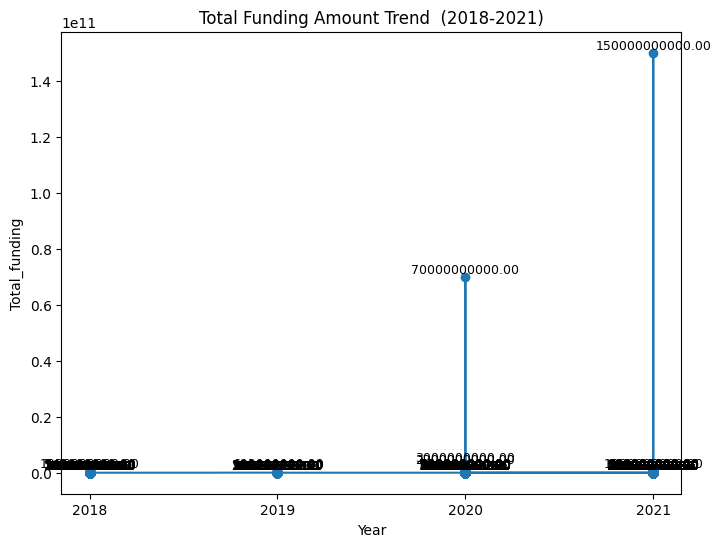

In [171]:
# Plot the total funding amount over the years
plt.figure(figsize=(8, 6))
plt.plot(df_combined['Year'], df_combined['Amount'], marker='o')

# Add data labels
for x, y in zip(df_combined['Year'], df_combined['Amount']):
    label = f"{y:.2f}"  # Format the label to display 2 decimal places
    plt.text(x, y, label, ha='center', va='bottom', fontsize=9, color='black')

plt.xlabel('Year')
plt.ylabel('Total_funding')
plt.title('Total Funding Amount Trend  (2018-2021)')
plt.xticks(Total_funding['Year'])
plt.show()

In [152]:
# HoW has the average funding amount in each Sector changed over the years 

# The data to include years 2018 to 2021
Year = df_combined['Year']

# Group the data by 'Sector' and 'Year', and calculate the mean 'Amount'
average_funding = df_combined.groupby(['Sector', 'Year'])['Amount'].mean().reset_index()

# Sort the DataFrame in descending order based on 'Amount'
average_funding = average_funding.sort_values('Amount', ascending=False)

average_funding

,Sector,Year,Amount
586,Retail,2020,1.170657e+10
525,Multinational Conglomerate Company,2020,2.200000e+09
323,Fintech,2021,1.315832e+09
345,Food Delivery,2021,8.000000e+08
403,Hospitality,2019,6.930000e+08
...,...,...,...
248,E-Commerce & Ar,2019,0.000000e+00
353,Food Tech,2019,0.000000e+00
602,Safety Tech,2019,0.000000e+00
373,Health,2019,0.000000e+00


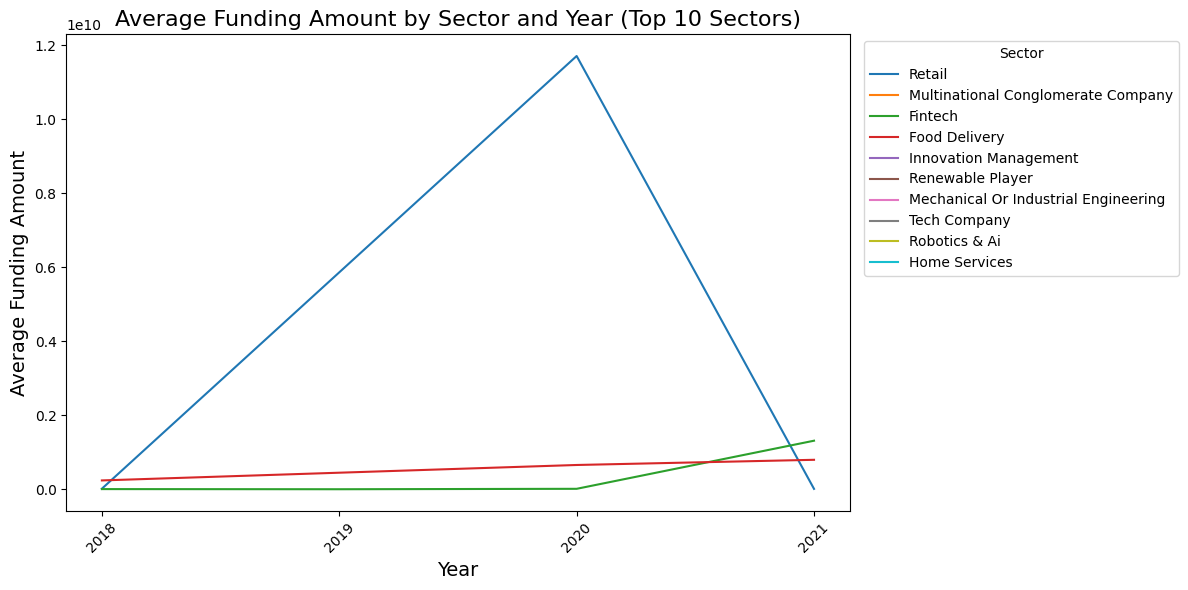

In [153]:
# Select the top 10 sectors
top_10_sectors = average_funding.groupby('Sector')['Amount'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_funding[average_funding['Sector'].isin(top_10_sectors['Sector'])],
             x='Year', y='Amount', hue='Sector')

# Customize the plot
plt.title('Average Funding Amount by Sector and Year (Top 10 Sectors)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Funding Amount', fontsize=14)
plt.xticks(average_funding['Year'].unique(), rotation=45)
plt.legend(title='Sector', loc='upper left', bbox_to_anchor=(1.01, 1))
plt.tight_layout()

# Show the plot
plt.show()

2. Sector Analysis:
Which sectors have received the most funding, and how does the funding distribution vary across sectors?

Top Sectors by Total Funding Amount:
                                 Sector        Amount
249                             Fintech  1.548848e+11
447                              Retail  7.054743e+10
206                              Edtech  6.493495e+09
195                          E-Commerce  3.087002e+09
497                        Tech Company  3.029350e+09
263                       Food Delivery  2.675300e+09
49                           Automotive  2.272565e+09
396  Multinational Conglomerate Company  2.200000e+09
248                  Financial Services  1.826480e+09
305                         Hospitality  1.733930e+09


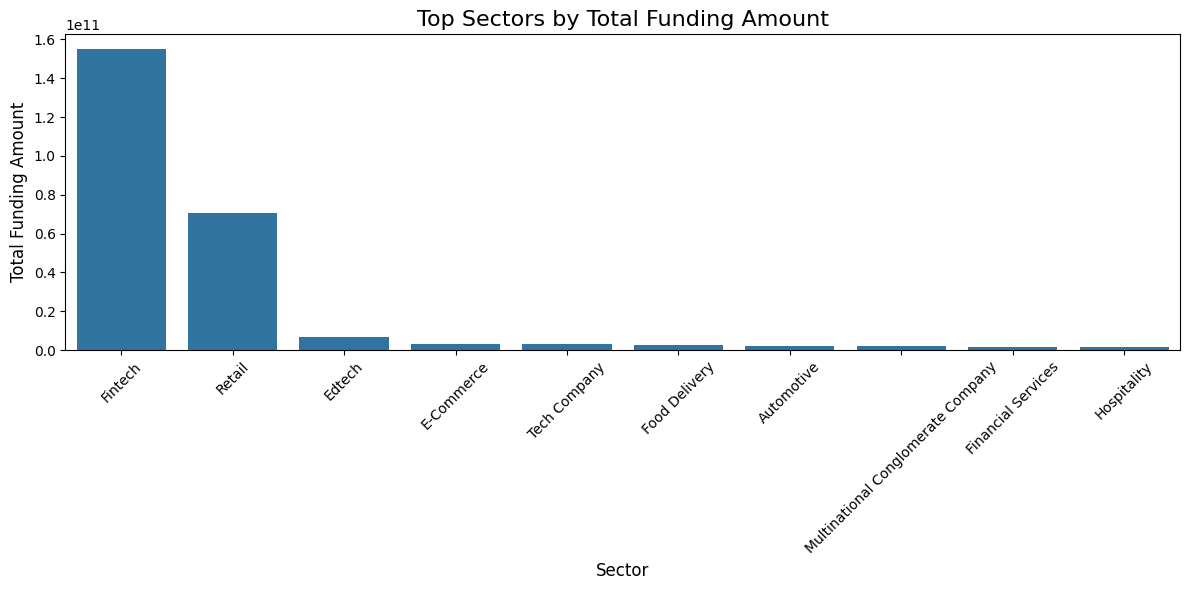

In [154]:
# Calculate total funding amount for each sector
total_funding_by_sector = df_combined.groupby('Sector')['Amount'].sum().reset_index()

# Sort the sectors by total funding amount in descending order
total_funding_by_sector = total_funding_by_sector.sort_values('Amount', ascending=False)

# Print the top sectors by total funding amount
print("Top Sectors by Total Funding Amount:")
print(total_funding_by_sector.head(10))

# Visualize the funding distribution across sectors
plt.figure(figsize=(12, 6))
sns.barplot(x='Sector', y='Amount', data=total_funding_by_sector.head(10))
plt.xticks(rotation=45)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Total Funding Amount', fontsize=12)
plt.title('Top Sectors by Total Funding Amount', fontsize=16)
plt.tight_layout()
plt.show()

3. Stage Analysis:
What is the distribution of funding across different investment stages (e.g., Pre-seed, Seed, Series A)?

In [155]:
# Calculate total funding amount for each investment stage
total_funding_by_stage = df_combined.groupby('Stage')['Amount'].sum().reset_index()

# Sort the investment stages by total funding amount in descending order
total_funding_by_stage = total_funding_by_stage.sort_values('Amount', ascending=False)

# Print the investment stages by total funding amount
print("Investment Stages by Total Funding Amount:")
print(total_funding_by_stage)


Investment Stages by Total Funding Amount:
                    Stage        Amount
6                    Debt  1.518215e+11
42             Seed Round  7.230957e+10
54               Series B  1.064595e+10
58               Series C  1.004923e+10
50               Series A  6.515232e+09
..                    ...           ...
39                 Seed A  1.000000e+06
13             Mid series  5.000000e+05
45             Seed fund   4.605000e+05
23          Pre series A1  3.000000e+05
14  Non-equity Assistance  4.000000e+04

[72 rows x 2 columns]


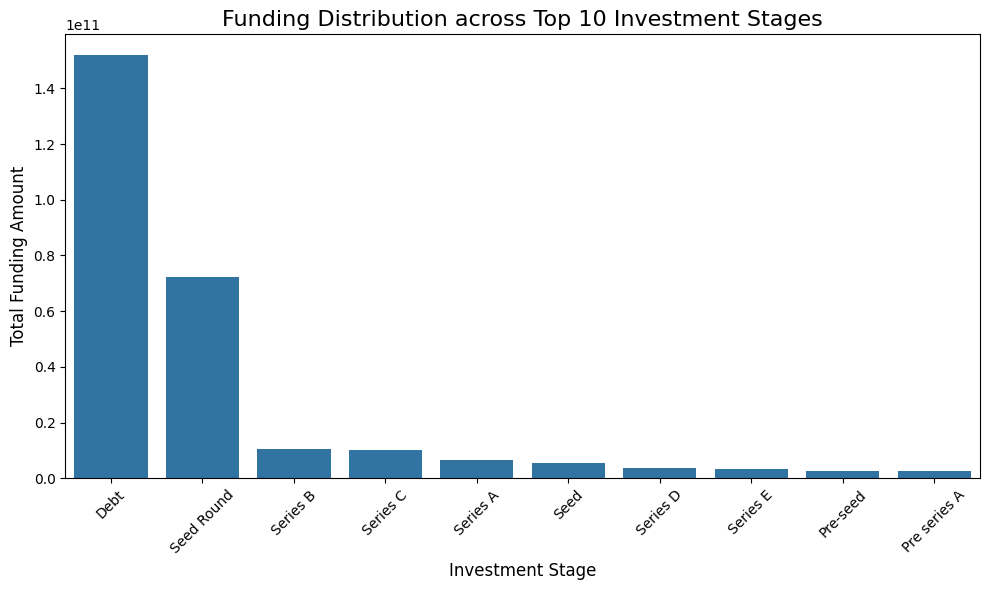

In [156]:
# Select the top 10 stages
top_10_stages = total_funding_by_stage.head(10)

# Visualize the funding distribution across the top 10 investment stages
plt.figure(figsize=(10, 6))
sns.barplot(x='Stage', y='Amount', data=top_10_stages)
plt.xticks(rotation=45)
plt.xlabel('Investment Stage', fontsize=12)
plt.ylabel('Total Funding Amount', fontsize=12)
plt.title('Funding Distribution across Top 10 Investment Stages', fontsize=16)
plt.tight_layout()
plt.show()

4. Geographical Analysis:
Which cities or regions (HeadQuarter) have the highest concentration of funded startups?

In [157]:
# Calculate total funding amount for each HeadQuarter
total_funding_by_hq = df_combined.groupby('HeadQuarter')['Amount'].sum().reset_index()

# Sort the HeadQuarter locations by total funding amount in descending order
total_funding_by_hq = total_funding_by_hq.sort_values('Amount', ascending=False)

# Print the top 10 HeadQuarter locations by total funding amount
print("Top 10 HeadQuarter Locations by Total Funding Amount:")
print(total_funding_by_hq.head(10))

Top 10 HeadQuarter Locations by Total Funding Amount:
                     HeadQuarter        Amount
98                        Mumbai  2.291451e+11
11                     Bangalore  2.249236e+10
55                      Gurugram  5.794634e+09
27                    California  3.134300e+09
102                    New Delhi  3.084627e+09
13   Bangalore, Karnataka, India  2.323135e+09
99    Mumbai, Maharashtra, India  1.608798e+09
120                         Pune  1.596625e+09
30                       Chennai  1.083187e+09
1                      Ahmedabad  8.954997e+08


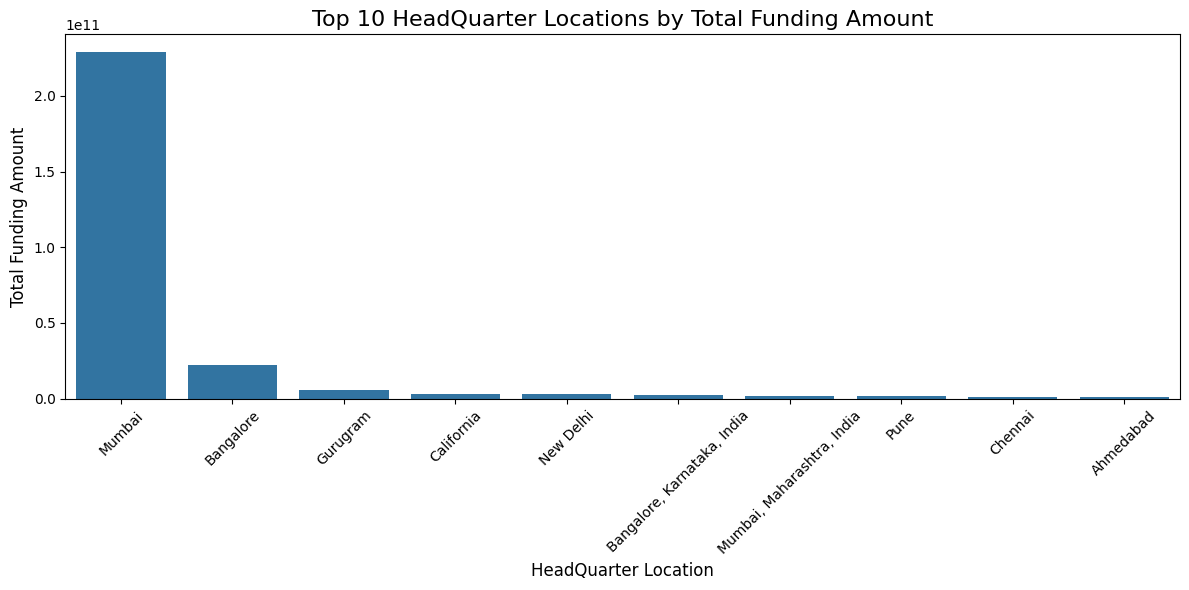

In [158]:
# Visualize the funding distribution across HeadQuarter locations
plt.figure(figsize=(12, 6))
sns.barplot(x='HeadQuarter', y='Amount', data=total_funding_by_hq.head(10))
plt.xticks(rotation=45)
plt.xlabel('HeadQuarter Location', fontsize=12)
plt.ylabel('Total Funding Amount', fontsize=12)
plt.title('Top 10 HeadQuarter Locations by Total Funding Amount', fontsize=16)
plt.tight_layout()
plt.show()

5. Investor Influence:
Who are the top investors in the Indian startup ecosystem, and what is their funding pattern?

In [159]:
# Calculate total funding amount for each investor
total_funding_by_investor = df_combined.groupby('Investor')['Amount'].sum().reset_index()

# Sort the investors by total funding amount in descending order
total_funding_by_investor = total_funding_by_investor.sort_values('Amount', ascending=False)

# Print the top 10 investors by total funding amount
print("Top 10 Investors in Indian Startup Ecosystem:")
print(total_funding_by_investor.head(10))

Top 10 Investors in Indian Startup Ecosystem:
                                               Investor        Amount
1595                                  Venture Catalysts  1.500840e+11
1341           Silver Lake, Mubadala Investment Company  7.000000e+10
1253    Salesforce Ventures, Dragoneer Investment Group  3.000000e+09
480                  Facebook, Google, Kkr, Silver Lake  2.200000e+09
1492                                       Tiger Global  1.417000e+09
1071              Owl Ventures, Tiger Global Management  1.200000e+09
332   Canaan Valley Capital, Glade Brook Capital Par...  1.000000e+09
487   Falcon Edge, Dst Global, D1 Capital, Redbird C...  8.400000e+08
528           General Atlantic, Kohlberg Kravis Roberts  8.000000e+08
340                      Carmignac, Falcon Edge Capital  8.000000e+08


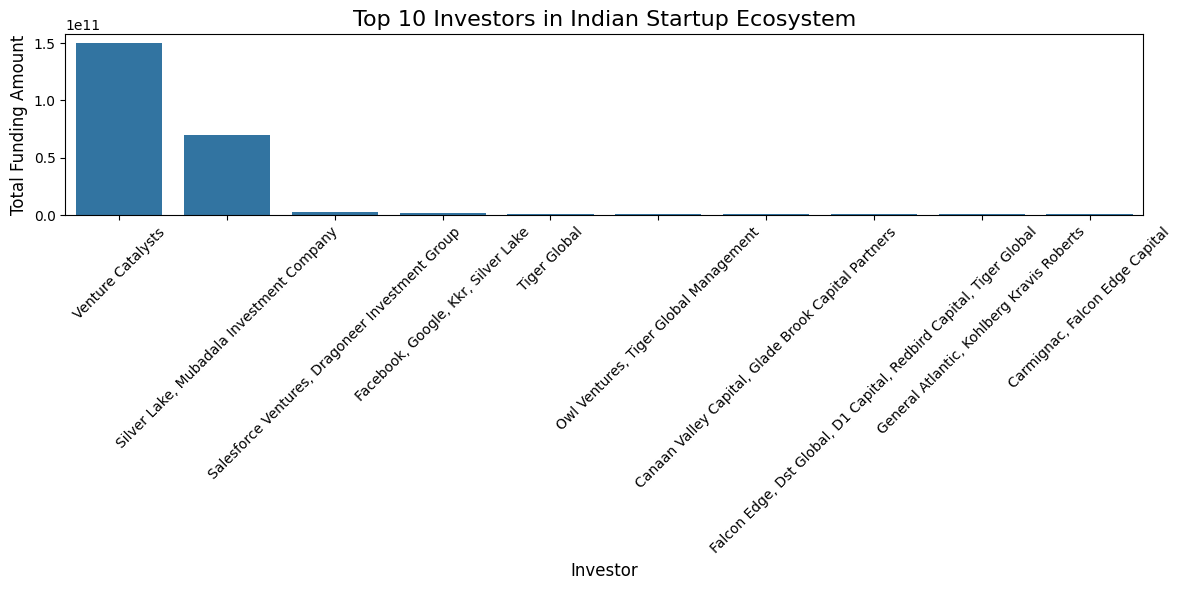

In [160]:
# Visualize the funding distribution across top investors
plt.figure(figsize=(12, 6))
sns.barplot(x='Investor', y='Amount', data=total_funding_by_investor.head(10))
plt.xticks(rotation=45)
plt.xlabel('Investor', fontsize=12)
plt.ylabel('Total Funding Amount', fontsize=12)
plt.title('Top 10 Investors in Indian Startup Ecosystem', fontsize=16)
plt.tight_layout()
plt.show()

6. Founder Impact:
Is there a correlation between the number of founders and the amount of funding received?

In [161]:
# Calculate total funding amount for each founder
total_funding_by_founder = df_combined.groupby('Founders')['Amount'].sum().reset_index()

# Sort the founders by total funding amount in descending order
total_funding_by_founder = total_funding_by_founder.sort_values('Amount', ascending=False)

# Select the top 10 founders
top_5_founders = total_funding_by_founder.head(10)

# Group the data by the number of founders and calculate the median funding amount
funding_by_num_founders = top_5_founders.groupby('Founders')['Amount'].median().reset_index()

total_funding_by_founder.head()

,Founders,Amount
1891,Vinod Murali,1.500000e+11
1041,Mukesh Ambani,7.082022e+10
475,"Benoit Dageville, Bob Muglia, Marcin Zukowski,...",3.000000e+09
602,Dhirubhai Ambani,2.200000e+09
509,Byju Raveendran,2.068000e+09


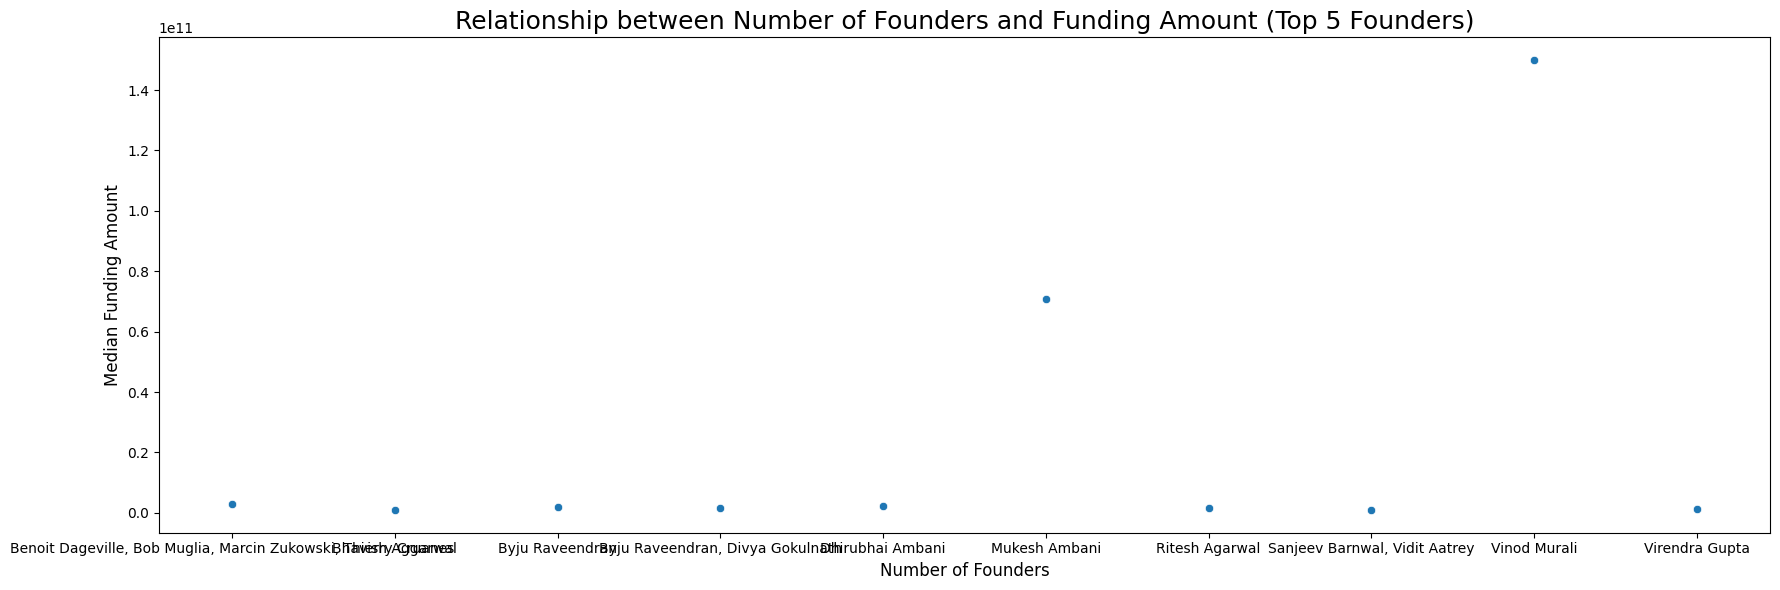

In [162]:
# Plot the data
plt.figure(figsize=(18, 6))
sns.scatterplot(x='Founders', y='Amount', data=funding_by_num_founders)
plt.xlabel('Number of Founders', fontsize=12)
plt.ylabel('Median Funding Amount', fontsize=12)
plt.title('Relationship between Number of Founders and Funding Amount (Top 5 Founders)', fontsize=18)
plt.tight_layout()
plt.show()

7. What are the characteristics of startups in the highest-funded sectors (e.g., number of founders, location)?

In [163]:
# Calculate total funding amount for each sector
total_funding_by_sector = df_combined.groupby('Sector')['Amount'].sum().reset_index()

# Sort the sectors by total funding amount in descending order
total_funding_by_sector = total_funding_by_sector.sort_values('Amount', ascending=False)

# Select the top 10 highest-funded sectors
top_10_sectors = total_funding_by_sector.head(10)['Sector'].tolist()

# Filter the data for the top 10 highest-funded sectors
top_funded_startups = df_combined[df_combined['Sector'].isin(top_10_sectors)]

# Print the company brand, location, founders, and what they do for the top-funded startups
for _, row in top_funded_startups.iterrows():
    print(f"Company Brand: {row['Company_Brand']}")
    print(f"Headquarters: {row['HeadQuarter']}")
    print(f"Stage: {row['Stage']}")
    print(f"What it does: {row['What_it_does']}")
    print("---")

Company Brand: Krayonnz
Headquarters: Bangalore
Stage: Pre-seed
What it does: An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.
---
Company Brand: Myclassboard
Headquarters: Hyderabad
Stage: Pre-series A
What it does: MyClassboard is a full-fledged School / College Management Software.
---
Company Brand: Rupeek
Headquarters: Bangalore
Stage: Series C
What it does: Rupeek is an online lending platform that specializes in credit risk, gold loans, and personal loans.
---
Company Brand: Zomato
Headquarters: Gurgaon
Stage: Pre series A
What it does: Zomato is a food delivery and restaurant discovery site that provides information and reviews about restaurants
---
Company Brand: Shiprocket
Headquarters: New Delhi
Stage: Series C
What it does: Shiprocket helps online retailers simplify their shipping by providing a delightful post purchase experience to their consumers.
---
Company Brand: Pine Labs
Headquarters: Noida
Stage: Series A
What i

8. Which Business is more viable to set - The best performing business(s) ? The determinants for our best performing will be determined from the sector that recieved the highest funding Amount and not in debt and exsists in the Stage: Series D onwads. 

In [164]:
# Filter out companies that are in debt
not_in_debt = df_combined[df_combined['Stage'] != 'Debt']

# Filter out companies that are in Series D or later stages
series_d_or_later = not_in_debt[not_in_debt['Stage'].isin(['Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I'])]

# Calculate total funding amount for each sector
total_funding_by_sector = series_d_or_later.groupby('Sector')['Amount'].sum().reset_index()

# Sort the sector by total funding amount in descending order
total_funding_by_sector = total_funding_by_sector.sort_values('Amount', ascending=False)

# Select the top company (or companies) with the highest funding amount
top_funded_sector = total_funding_by_sector.head()

# Print the top funded sector 
print("Best Performing Sector:")
for _, row in top_funded_sector.iterrows():
    print(f"Sector: {row['Sector']}")
    print(f"Total Funding Amount: {row['Amount']}")
    print("---")

Best Performing Sector:
Sector: Fintech
Total Funding Amount: 1146492000.0
---
Sector: Automotive
Total Funding Amount: 1086000000.0
---
Sector: Innovation Management
Total Funding Amount: 1000000000.0
---
Sector: Food Delivery
Total Funding Amount: 1000000000.0
---
Sector: Edtech
Total Funding Amount: 781761000.0
---


Loading df_combined dataset to a csv file 

In [165]:
# Load the csv into a dataframe

df_combined.to_csv('clean_combined_LP1dataset.csv', index= False)

